<a href="https://colab.research.google.com/github/luthfiyyah-a/Kuliah-Data-Minining/blob/main/Copy_of_Group_8_Data_Mining_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
pd.set_option('display.max_column',None)
warnings.filterwarnings("ignore")

# Import Dataset

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cred = {"username":"ingwerludwig","key":"6ac3b6368e0a5037ee76a81348c507ed"}

In [ ]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d parulpandey/palmer-archipelago-antarctica-penguin-data

  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 9.80MB/s]


In [ ]:
!unzip palmer-archipelago-antarctica-penguin-data.zip

Archive:  palmer-archipelago-antarctica-penguin-data.zip
  inflating: penguins_lter.csv       
  inflating: penguins_size.csv       


In [ ]:
!ls -la

total 96
drwxr-xr-x 1 root root  4096 Mar 17 12:07 .
drwxr-xr-x 1 root root  4096 Mar 17 11:42 ..
drwxr-xr-x 4 root root  4096 Mar 15 13:39 .config
-rw-r--r-- 1 root root 11558 Mar 17 12:07 palmer-archipelago-antarctica-penguin-data.zip
-rw-r--r-- 1 root root 50914 Jun  9  2020 penguins_lter.csv
-rw-r--r-- 1 root root 13519 Jun  9  2020 penguins_size.csv
drwxr-xr-x 1 root root  4096 Mar 15 13:40 sample_data


In [ ]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
print('Row length : '+ str(df.shape[0]))
print('Column length : '+ str(df.shape[1]))

Row length : 344
Column length : 7


# Exploratory Data Analysis

## Data Description
1. species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
2. culmen_length_mm: culmen length (mm)<br>
3. culmen_depth_mm: culmen depth (mm) (paruh in IDN)<br>
4. flipper_length_mm: flipper length (mm) (tangan in IDN)<br>
5. body_mass_g: body mass (g)<br>
6. island: island name (Dream, Torgersen, or Biscoe) in the Palmer<br>
7. Archipelago (Antarctica)<br>
8. sex: penguin sex<br>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

# Data Preprocessing

## Correcting Invalid Column Value

In [ ]:
df = df[(df.sex == 'FEMALE') | (df.sex == 'MALE')]

In [ ]:
df.nunique()

species                3
island                 3
culmen_length_mm     163
culmen_depth_mm       79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

## Handle Missing Value Based On Their Species

In [ ]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df.groupby('species')['culmen_length_mm'].transform('mean'))

In [ ]:
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df.groupby('species')['culmen_depth_mm'].transform('mean'))

In [ ]:
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df.groupby('species')['flipper_length_mm'].transform('mean'))

In [ ]:
df['body_mass_g'] = df['body_mass_g'].fillna(df.groupby('species')['body_mass_g'].transform('mean'))

In [ ]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [ ]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Feature Visualization

In [ ]:
# Function to Plot DF Features
def plot_visualize(df,start_index):
  while start_index < len(df.columns)-1:
    sns.set_style("whitegrid")
    sns.distplot(df[df.columns[start_index]])
    plt.show()
    start_index+=1

## Data Before Standardization

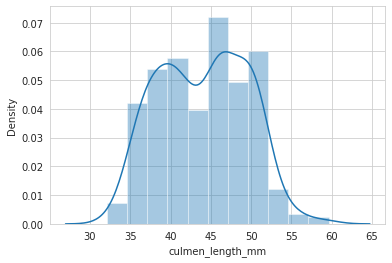

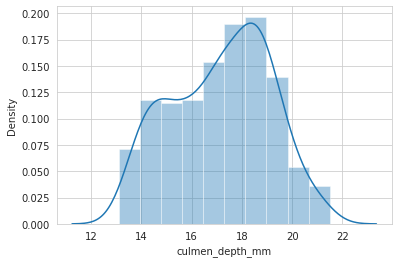

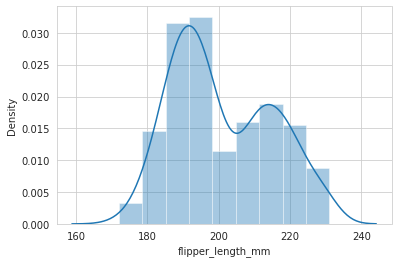

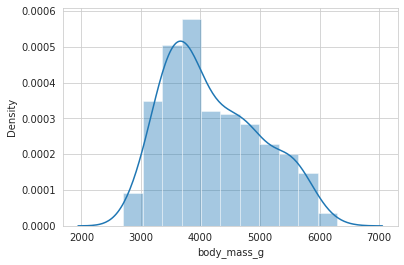

In [ ]:
plot_visualize(df,2)

<Axes: >

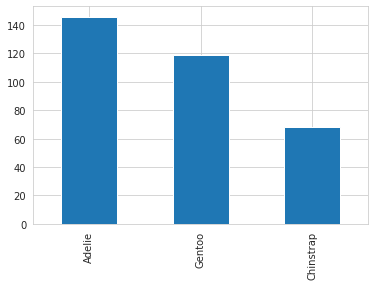

In [ ]:
df['species'].value_counts().plot(kind='bar')

<Axes: >

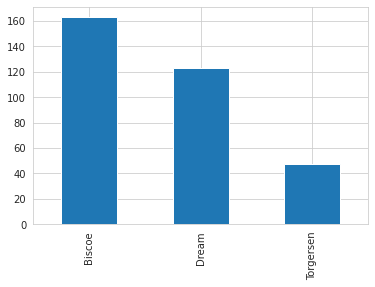

In [ ]:
df['island'].value_counts().plot(kind='bar')

<Axes: >

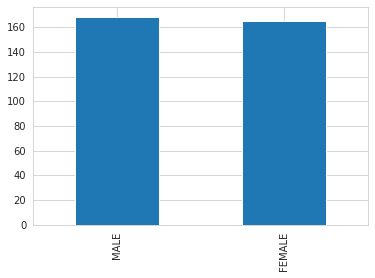

In [ ]:
df['sex'].value_counts().plot(kind='bar')

Island, Species columns are imbalance

## Data After Standardization